In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
np.random.seed(42)
X = np.zeros((400, 2))
X[:100, :] = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
X[100:200, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, 2])
X[200:300, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, -2])
X[300:, :] = np.random.randn(100, 2) * 0.5 + np.array([2, -2])

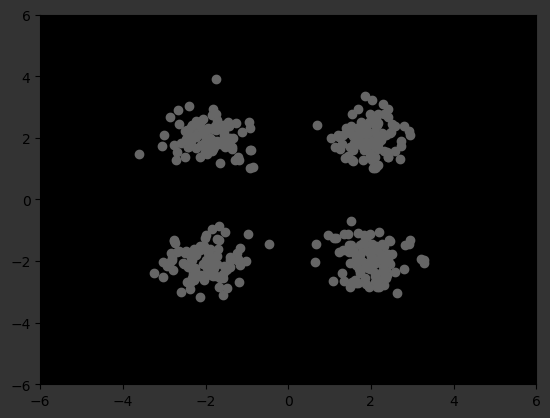

In [3]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

--------

# Lloyd's algorithm

In [4]:
k = 4 # amount of clusters
max_iterations = 100

In [5]:
np.random.seed(42)
initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
centroids = X[initial_indices, :]
centroids #the initial centroids are 4 random observations of the dataset

array([[-1.41035141, -1.96624076],
       [-1.85511257, -0.9622996 ],
       [ 1.96399494,  2.50176645],
       [-0.96962604, -1.12232958]])

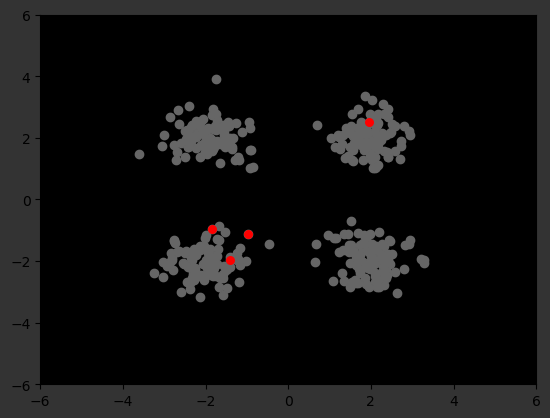

In [6]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(centroids[:,0], centroids[:,1],zorder=2, color='red', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [7]:
for i in range(max_iterations):
    # calculate Euclidean distances from each data point to each centroid
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
    
    # assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)
    
    # calculate new centroids as the mean of each cluster
    new_centroids = np.array([X[labels == j, :].mean(axis=0) for j in range(k)])
    
    # check if the centroids have changed (i.e., if we have converged)
    if np.allclose(centroids, new_centroids):
        break
    
    centroids = new_centroids

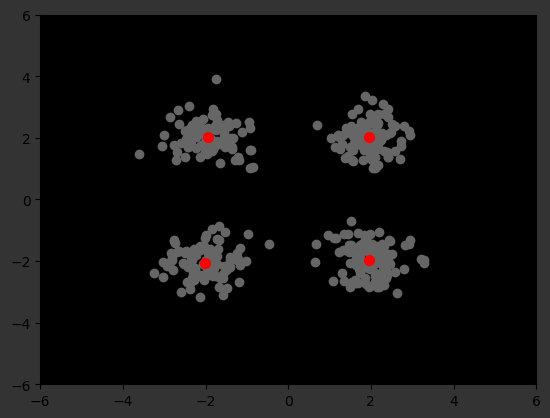

In [8]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [9]:
X_labeled = np.column_stack((X, labels))
X_labeled

array([[ 2.24835708,  1.93086785,  2.        ],
       [ 2.32384427,  2.76151493,  2.        ],
       [ 1.88292331,  1.88293152,  2.        ],
       ...,
       [ 1.45947173, -1.47342357,  3.        ],
       [ 1.98022242, -1.65924965,  3.        ],
       [ 2.01415919, -1.98512193,  3.        ]])

In [10]:
idx_sorted = np.argsort(X_labeled[:, -1])
X_labeled_sorted = X_labeled[idx_sorted, :]

In [11]:
labels, counts = np.unique(X_labeled[:, -1], return_counts=True)
label_counts = dict(zip(labels, counts))

for label in label_counts:
    print("Cluster {}: {} data points".format(label, label_counts[label]))

Cluster 0.0: 100 data points
Cluster 1.0: 100 data points
Cluster 2.0: 100 data points
Cluster 3.0: 100 data points


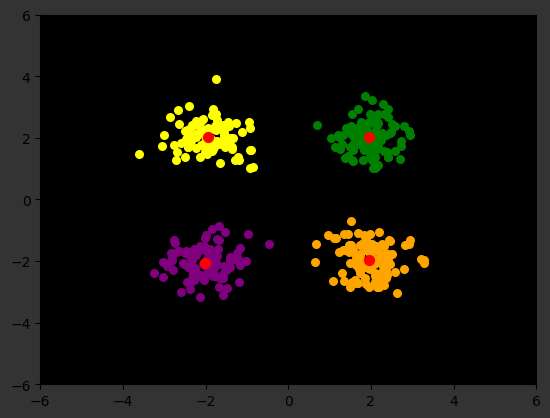

In [12]:
plt.axes().set_facecolor('black')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.scatter(X[:100, 0],X[:100, 1] ,zorder=1, color='green', s=30)
plt.scatter(X[100:200, 0],X[100:200, 1] ,zorder=1, color='yellow', s=30)
plt.scatter(X[200:300, 0],X[200:300, 1] ,zorder=1, color='purple', s=30)
plt.scatter(X[300:, 0],X[300:, 1] ,zorder=1, color='orange', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()